In [2]:
import sys
sys.path.append("../../")
import helper
from pandas import read_excel,DataFrame,melt,merge,read_csv
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["axes.unicode_minus"] = False

In [4]:
origin=read_csv('공모전 및 프로젝트 엑셀파일/자치구단위 서울생활인구 일별 집계표.csv',encoding='euc-kr')
origin.head()

,기준일ID,시군구코드,시군구명,총생활인구수,내국인생활인구수,장기체류외국인인구수,단기체류외국인인구수,일최대인구수,일최소인구수,주간인구수(09~18),야간인구수(19~08),일최대이동인구수,서울외유입인구수,동일자치구행정동간이동인구수,자치구간이동인구수
0,20230930,11000,서울시,9.096046e+06,8.527635e+06,390888.9283,177522.5996,9.352101e+06,8.914035e+06,9.012456e+06,9.155754e+06,3.770481e+06,1.103794e+06,1.471112e+06,1.195575e+06
1,20230930,11110,종로구,2.554366e+05,2.190069e+05,19409.2286,17020.4498,3.406000e+05,2.054123e+05,3.059042e+05,2.193883e+05,1.803915e+05,7.720896e+04,2.207391e+04,8.110863e+04
2,20230930,11140,중구,2.250453e+05,1.630567e+05,18038.0247,43950.6229,2.679263e+05,1.934136e+05,2.510441e+05,2.064747e+05,1.322318e+05,4.811631e+04,2.022280e+04,6.389273e+04
3,20230930,11170,용산구,2.635796e+05,2.366308e+05,16969.9194,9978.8371,2.889795e+05,2.414314e+05,2.772179e+05,2.538380e+05,1.337811e+05,5.012750e+04,3.170267e+04,5.195095e+04
4,20230930,11200,성동구,2.850278e+05,2.683936e+05,13871.2015,2762.9894,2.939953e+05,2.788253e+05,2.832078e+05,2.863279e+05,1.202074e+05,3.042158e+04,3.968445e+04,5.010134e+04


In [5]:
df=origin.copy()
df.head()

,기준일ID,시군구코드,시군구명,총생활인구수,내국인생활인구수,장기체류외국인인구수,단기체류외국인인구수,일최대인구수,일최소인구수,주간인구수(09~18),야간인구수(19~08),일최대이동인구수,서울외유입인구수,동일자치구행정동간이동인구수,자치구간이동인구수
0,20230930,11000,서울시,9.096046e+06,8.527635e+06,390888.9283,177522.5996,9.352101e+06,8.914035e+06,9.012456e+06,9.155754e+06,3.770481e+06,1.103794e+06,1.471112e+06,1.195575e+06
1,20230930,11110,종로구,2.554366e+05,2.190069e+05,19409.2286,17020.4498,3.406000e+05,2.054123e+05,3.059042e+05,2.193883e+05,1.803915e+05,7.720896e+04,2.207391e+04,8.110863e+04
2,20230930,11140,중구,2.250453e+05,1.630567e+05,18038.0247,43950.6229,2.679263e+05,1.934136e+05,2.510441e+05,2.064747e+05,1.322318e+05,4.811631e+04,2.022280e+04,6.389273e+04
3,20230930,11170,용산구,2.635796e+05,2.366308e+05,16969.9194,9978.8371,2.889795e+05,2.414314e+05,2.772179e+05,2.538380e+05,1.337811e+05,5.012750e+04,3.170267e+04,5.195095e+04
4,20230930,11200,성동구,2.850278e+05,2.683936e+05,13871.2015,2762.9894,2.939953e+05,2.788253e+05,2.832078e+05,2.863279e+05,1.202074e+05,3.042158e+04,3.968445e+04,5.010134e+04


In [6]:
df.isna().sum()

기준일ID             0
시군구코드             0
시군구명              0
총생활인구수            0
내국인생활인구수          0
장기체류외국인인구수        0
단기체류외국인인구수        0
일최대인구수            0
일최소인구수            0
주간인구수(09~18)      0
야간인구수(19~08)      0
일최대이동인구수          0
서울외유입인구수          0
동일자치구행정동간이동인구수    0
자치구간이동인구수         0
dtype: int64

In [7]:
df1=df.filter(['기준일ID','시군구코드','시군구명','총생활인구수','일최대인구수','일최소인구수'])
df1.head()
df1=df1.round(0)
df1.head()

,기준일ID,시군구코드,시군구명,총생활인구수,일최대인구수,일최소인구수
0,20230930,11000,서울시,9096046.0,9352101.0,8914035.0
1,20230930,11110,종로구,255437.0,340600.0,205412.0
2,20230930,11140,중구,225045.0,267926.0,193414.0
3,20230930,11170,용산구,263580.0,288979.0,241431.0
4,20230930,11200,성동구,285028.0,293995.0,278825.0


In [8]:
df_last_month=df1.iloc[0:26]
df_last_month
df_last_month2=df_last_month.drop(0)
df_last_month2

,기준일ID,시군구코드,시군구명,총생활인구수,일최대인구수,일최소인구수
1,20230930,11110,종로구,255437.0,340600.0,205412.0
2,20230930,11140,중구,225045.0,267926.0,193414.0
3,20230930,11170,용산구,263580.0,288979.0,241431.0
4,20230930,11200,성동구,285028.0,293995.0,278825.0
5,20230930,11215,광진구,328442.0,344770.0,315722.0
6,20230930,11230,동대문구,315628.0,329338.0,298187.0
7,20230930,11260,중랑구,332739.0,349199.0,307346.0
8,20230930,11290,성북구,377635.0,399845.0,344938.0
9,20230930,11305,강북구,278545.0,293129.0,263098.0
10,20230930,11320,도봉구,258662.0,270124.0,241134.0


In [9]:
df_last_month2=df_last_month2.sort_values('총생활인구수', ascending=False) #총생활인구수 기준 내림차순 정렬
df_last_month2

,기준일ID,시군구코드,시군구명,총생활인구수,일최대인구수,일최소인구수
24,20230930,11710,송파구,636216.0,676238.0,612347.0
23,20230930,11680,강남구,574085.0,605347.0,546491.0
16,20230930,11500,강서구,479555.0,493373.0,468520.0
11,20230930,11350,노원구,448720.0,474313.0,420330.0
25,20230930,11740,강동구,447647.0,476642.0,410666.0
19,20230930,11560,영등포구,429996.0,472414.0,402615.0
22,20230930,11650,서초구,410408.0,437890.0,384573.0
12,20230930,11380,은평구,405738.0,431355.0,373448.0
21,20230930,11620,관악구,400389.0,432722.0,369986.0
14,20230930,11440,마포구,395467.0,433376.0,369039.0


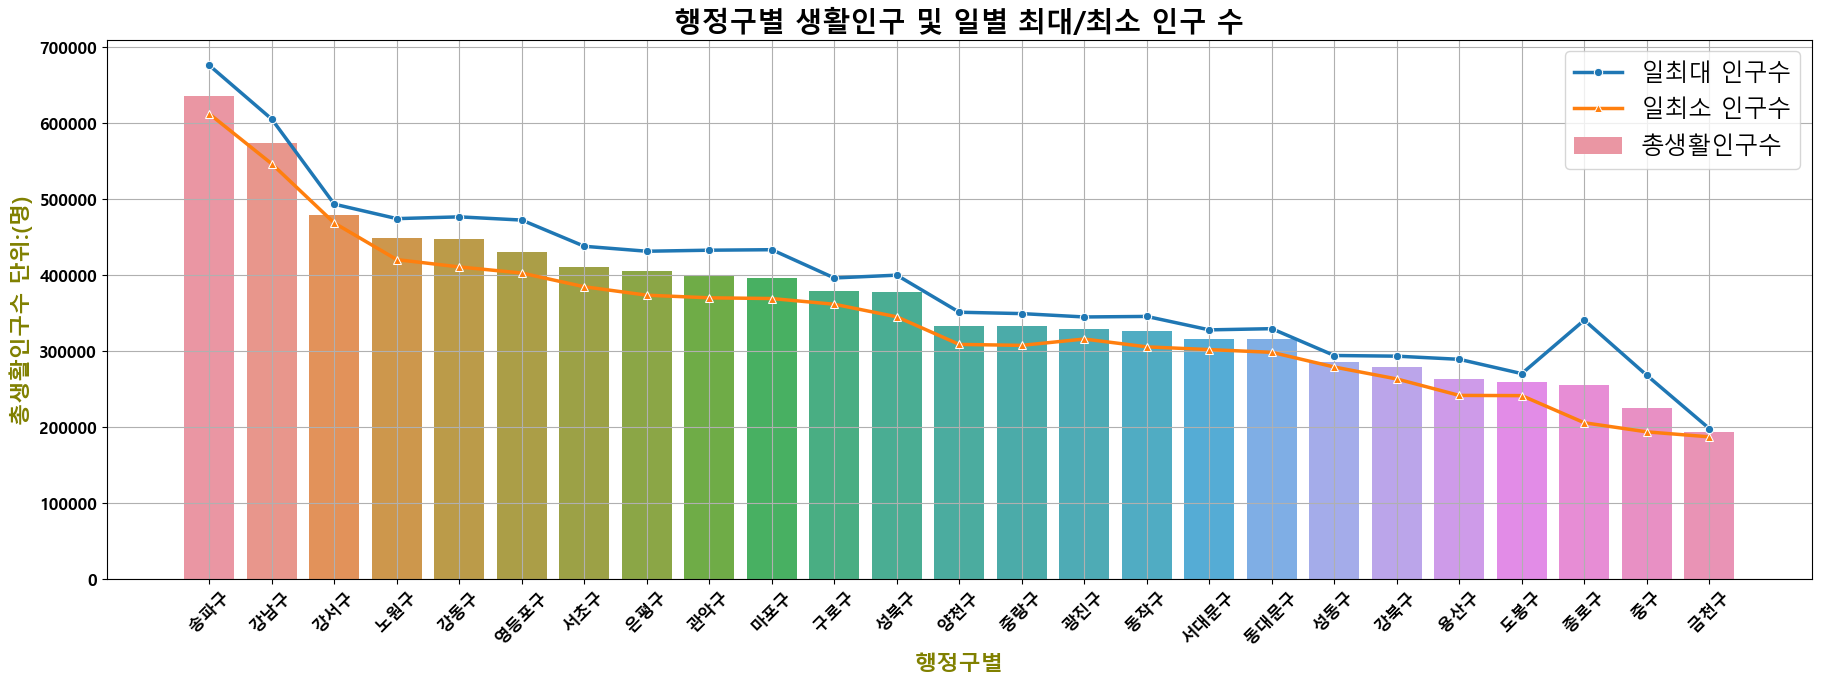

In [21]:
plt.figure(figsize=(22,7))
sb.barplot(data=df_last_month2,x='시군구명',y='총생활인구수',label='총생활인구수')
plt.title("행정구별 생활인구 및 일별 최대/최소 인구 수",fontsize=20,fontweight='bold')
plt.xlabel("행정구별",fontsize=16,fontweight='bold',color='olive')
plt.xticks(rotation=45,fontweight='bold')
plt.ylabel('총생활인구수 단위:(명)',fontsize=16,fontweight='bold',color='olive')
plt.yticks(fontweight='bold')
sb.lineplot(data=df_last_month2,x='시군구명',y='일최대인구수',marker='o',linewidth=2.5,label='일최대 인구수')
sb.lineplot(data=df_last_month2,x='시군구명',y='일최소인구수',marker='^',linewidth=2.5,label='일최소 인구수')
plt.legend(loc='upper right', fontsize=17,bbox_to_anchor=(1.0,1.0)) #범례 관련 조절 메서드
plt.grid()
plt.show()
plt.close()

행정구별 생활인구 및 일별 최대 인구수를 그래프로 확인한 결과 송파구,강남구,강서구 순으로 생활인구가 많은것으로 확인되었다.

특이한 점으로는 일최대 인구수는 생활인구수와 그렇게 차이가 많이 나지 않는편인데 유독 종로구는 일최대 인구수의 이동률이 높은것으로

보여진다. 이는 아무래도 종로구쪽에 노인인구가 많아 지하철 무료 혜택을 이용해서 많이 이동하다보니 그런것으로 추정된다.

In [11]:
# 시계열분석도 하는지...?